<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/09a_Afloramiento_MapaVariografico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapa variográfico - Dataset: Imagen afloramiento

> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Julio 2024

# Introducción

El `variograma` es un gráfico de dispersión que muestra la relación entre muestras, con la *distancia* en el eje de las abscisas y la *semivarianza* de todos los puntos distantes en el eje de las ordenadas.

La expresión de la semivarianza entre dos puntos es:

$$
\begin{equation}
\gamma = \frac{(v_i - v_j)^2}{2}
\end{equation}
$$

donde $v_i$ y $v_j$ son los valores de la variable $V$ que se encuentran a una distancia $h$.

Considerando todos los puntos, la semivarianza se define como:

$$
\begin{equation}
\gamma (h) = \frac{1}{2N(h)} \sum_{i=1}^N {(v_i - v_j)^2}
\end{equation}
$$


donde $N$ es el número de pares de datos que se encuentran a la distancia $h$.

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Schematic_variogram.svg/1024px-Schematic_variogram.svg.png' width=500 />

Schematisation of a variogram. The points represent the measured data points (observed) and the curve represents the model function used (empirical). Range stands for the range sought, sill for the plateau value reached at maximum range, nugget for the nugget effect. *Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Variogram
)*
</center>

---

Un panorama del patrón de variación espacial que permite detectar los ejes de anisotropía se obtiene con el `mapa de variograma`. El mapa de variograma se dibuja con los valores de varios variogramas direccionales.

> En nuestro caso, simplificaremos el proceso haciendo uso de una matriz, ya que trabajaremos con una imagen.



# Inicio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio # Para cargar la imagen
import cv2 # Para hacer el resize

<ipython-input-2-05c2eef7fc5c>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen = imageio.imread(rutaImagen) # Cargar imagen


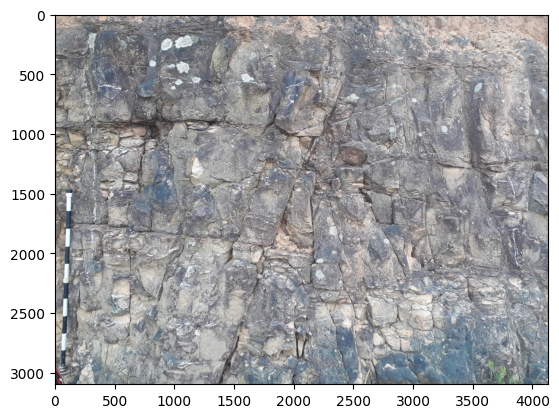

In [2]:
# Imagen de un afloramiento
rutaImagen = 'https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Afloramiento_20201223.jpg?raw=true'

# Solo una parte de la imagen, pero con los lineamientos solamente
#rutaImagen = 'https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Afloramiento_20201223_lineaminetos.png?raw=true'

imagen = imageio.imread(rutaImagen) # Cargar imagen

# verificar que este OK
plt.subplot(111)
plt.imshow(imagen)
plt.show()

In [3]:
# Para conocer la forma o tamaño de la imagen en pixeles
imagen.shape # El formato PNG puede tener 4 bandas

(3096, 4128, 3)

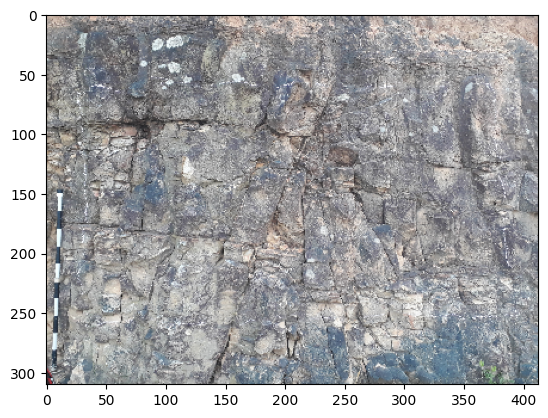

In [4]:
# vamos a ajustar el tamaño para no hacer tan largo el proceso

img_ = cv2.resize(imagen,
                    None, # Para evitar un error al no especificar la forma
                    fx = 0.1, # fracción a tomar de 0 a 1 para X
                    fy = 0.1) # fracción para Y ... 0.1 solo toma el 10%
imagen = img_
plt.subplot(111)
plt.imshow(img_)
plt.show()

In [5]:
# Verificar la reducción en pixeles
imagen.shape

(310, 413, 3)

In [6]:
imagen[:,:,0].shape # Para tomar toda una Banda de nuestro interés

(310, 413)

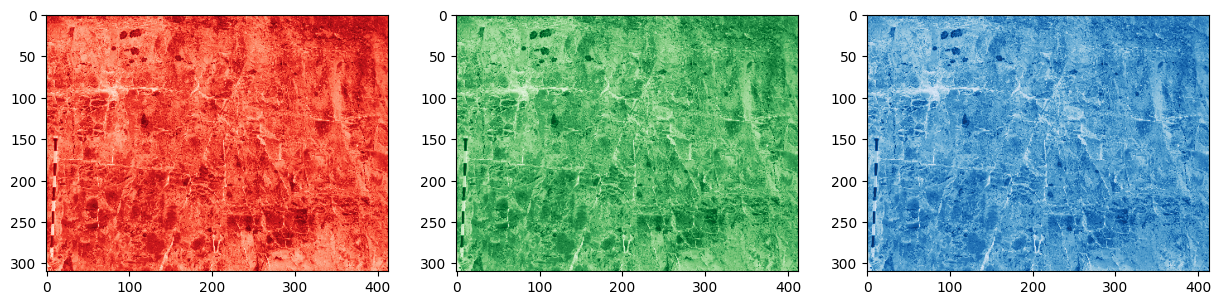

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(imagen[:,:,0], cmap='Reds') # R
ax[1].imshow(imagen[:,:,1], cmap='Greens') # G
ax[2].imshow(imagen[:,:,2], cmap='Blues') # B
plt.show()

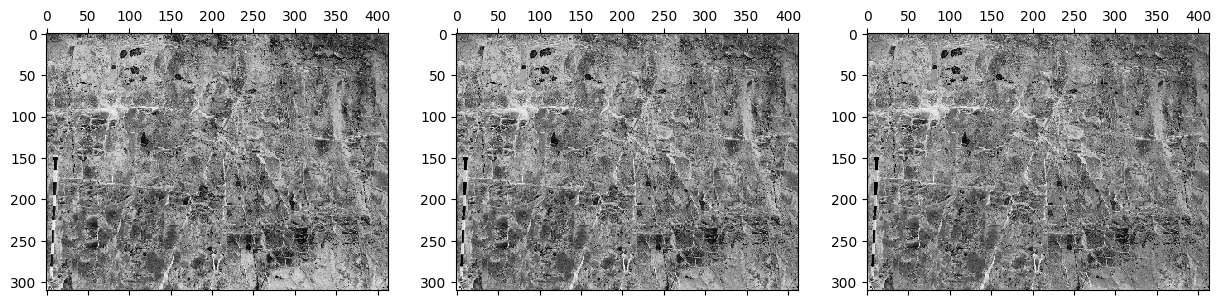

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].matshow(imagen[:,:,0], cmap='Greys') # R
ax[1].matshow(imagen[:,:,1], cmap='Greys') # G
ax[2].matshow(imagen[:,:,2], cmap='Greys') # B
plt.show()

Shape:  (310, 413)
Min:  5.0
Max:  255.0


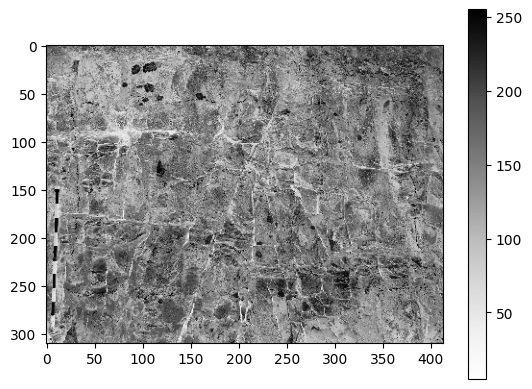

In [9]:
# Vamos a sacar un promedio para cada pixel de las bandas para solo tener 1 y pasarla a escala de grises
imagenGris = np.mean(imagen, axis=2)
print('Shape: ', imagenGris.shape)
print('Min: ', imagenGris.min())
print('Max: ', imagenGris.max())

plt.subplot(111)
plt.imshow(imagenGris, cmap='Greys')
plt.colorbar()
plt.show()

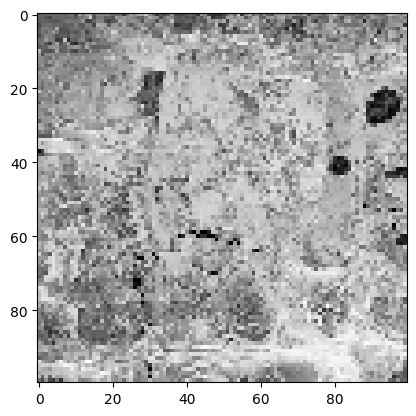

In [10]:
plt.subplot(111)
# En este caso puede ser contra intuitivo al hacer el slicing
# con el primer número se controlas las Y o filas
# con el segundo número se controlas las X o columnas
plt.imshow(imagenGris[:100,:100], cmap='Greys')
plt.show()

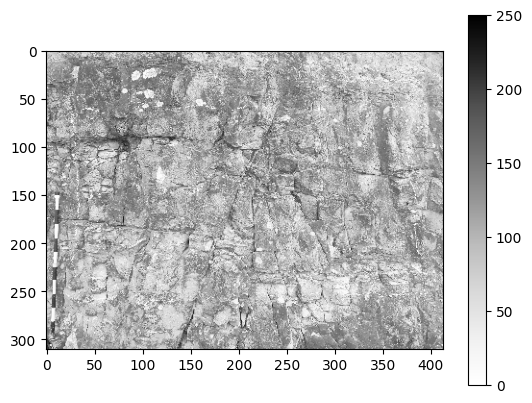

In [11]:
# a 255 se le va a restar los valores de los pixeles para que las fracturas pasen a negro
# y sea más cómodo de ver la imagen
imagenGris = 255 -  imagenGris

plt.subplot(111)
plt.imshow(imagenGris, cmap='Greys')
plt.colorbar()
plt.show()

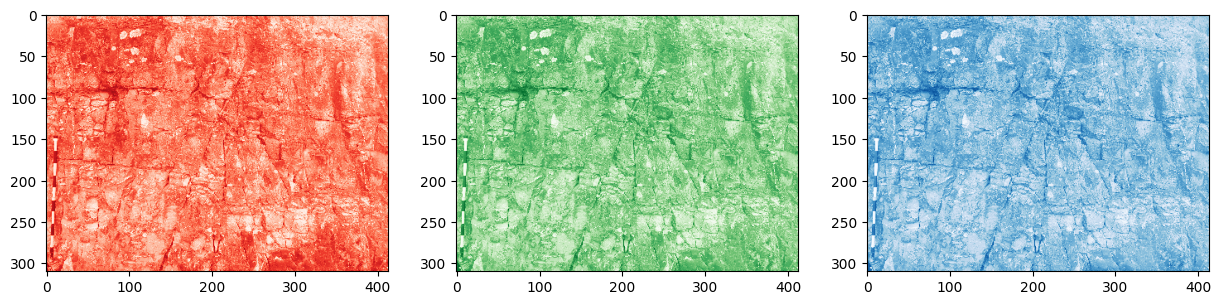

In [12]:
# Lo mismo para verificar en las bandas originales

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(255-imagen[:,:,0], cmap='Reds') # R
ax[1].imshow(255-imagen[:,:,1], cmap='Greens') # G
ax[2].imshow(255-imagen[:,:,2], cmap='Blues') # B
plt.show()

## Prueba pequeña escala

Antes de proceder con el cálculo utilizando la imagen de gran tamaño, consideraremos una matriz más pequeña para aplicar el procedimiento de estimación del mapa variográfico. De esta manera, podremos verificar si el código está funcionando correctamente.

In [13]:
matriz = np.arange(1,101).reshape(10,10)
matriz

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

[[242.  220.5 200.  180.5 162. ]
 [ 72.   60.5  50.   40.5  32. ]
 [  2.    0.5   0.    0.5   2. ]
 [ 32.   40.5  50.   60.5  72. ]
 [162.  180.5 200.  220.5 242. ]]


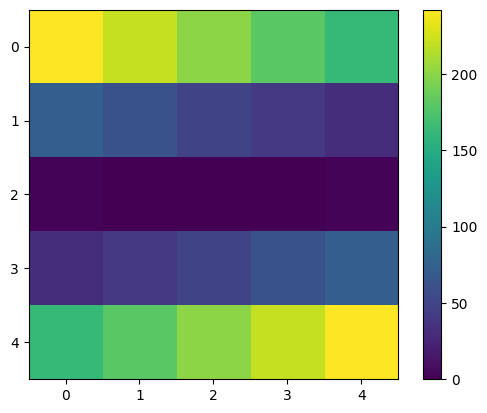

In [14]:
dx = 2 # en pixeles
dy = 2 # en pixeles
N = 0 # conteo de pares realizados
mapaVariograma = np.zeros((1+dx*2, 1+dy*2))

for i in range(dx, matriz.shape[0]-dx):
    for j in range(dy, matriz.shape[1]-dy):
        #print(i,j)
        pixel_x = i
        pixel_y = j
        valorPixel = matriz[pixel_x, pixel_y]

        #print('pixel', matriz[pixel_x, pixel_y])
        bloqueImagen = matriz[pixel_x-dx:pixel_x+dx+1, pixel_y-dy:pixel_y+dy+1]
        semivarianza = ((bloqueImagen - valorPixel)**2)/2
        #print(bloqueImagen.shape)
        #print(bloqueImagen)

        mapaVariograma = mapaVariograma + semivarianza
        N += 1

mapaVariograma = mapaVariograma/N
print(mapaVariograma)
plt.subplot(111)
plt.imshow(mapaVariograma, cmap='viridis')
plt.colorbar()
plt.show()

# Normalizar mean=0 std=1


En algunas ocasiones, es recomendable normalizar los datos para que tengan una media de 0 y una desviación estándar de 1. Procederemos a realizar este ajuste manualmente. Aunque no es un requisito obligatorio, como hemos discutido en otro Notebooks, es una práctica adecuada para trabajar con los datos.

> *Observación: Cuando los datos están normalizados, a veces se considera que la meseta del semivariograma es igual a la varianza, en este caso 1.0. Sin embargo, esto no debe tomarse como una regla absoluta, ya que la meseta puede variar debido a varios factores.*

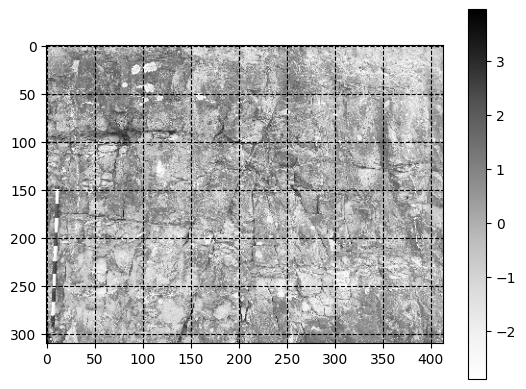

In [15]:
# normalizar antes la imagen con media 0 y var 1
imagenGris = (imagenGris - imagenGris.mean())/imagenGris.std()

plt.subplot(111)
plt.imshow(imagenGris, cmap='Greys')
plt.colorbar()
plt.grid(ls='--', c='k')
plt.show()

# Mapa variográfico

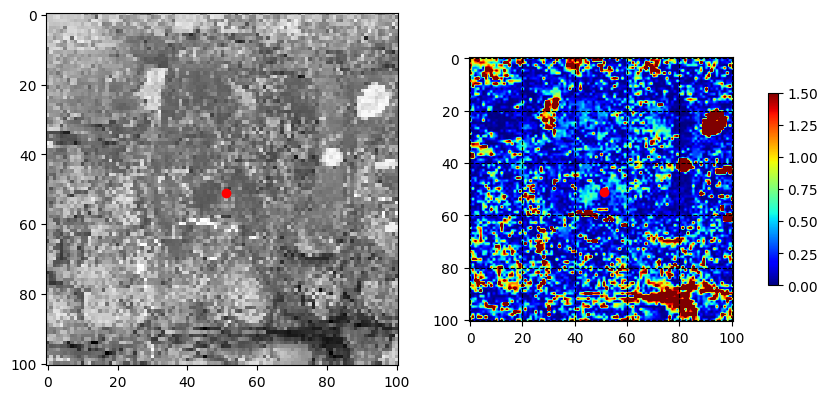

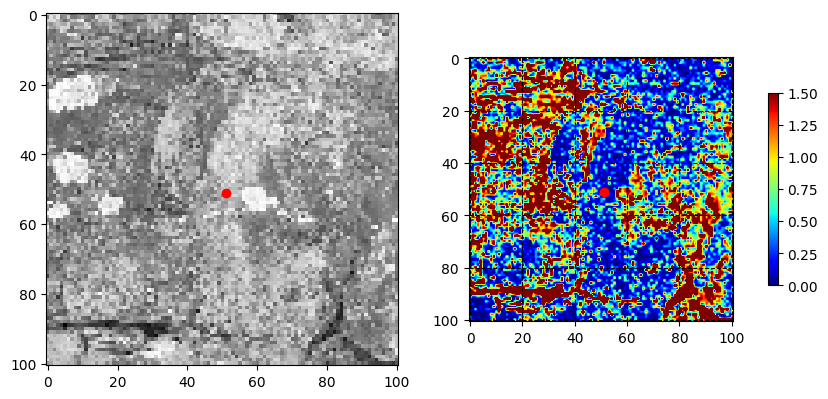

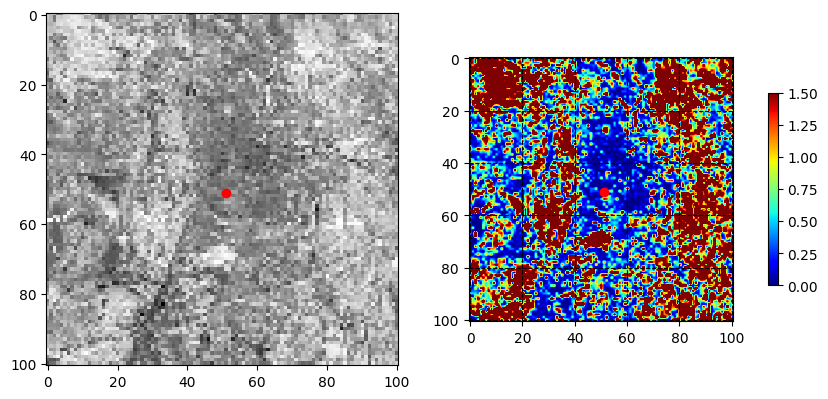

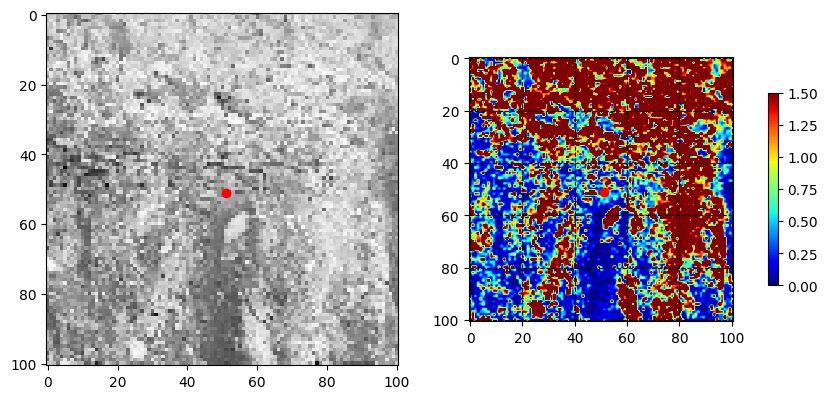

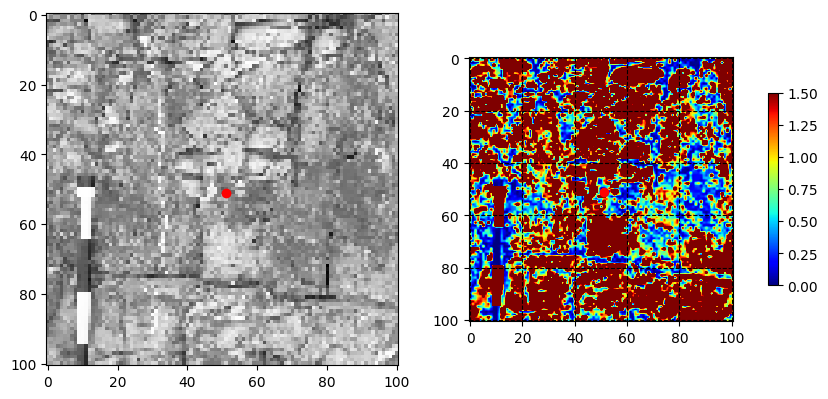

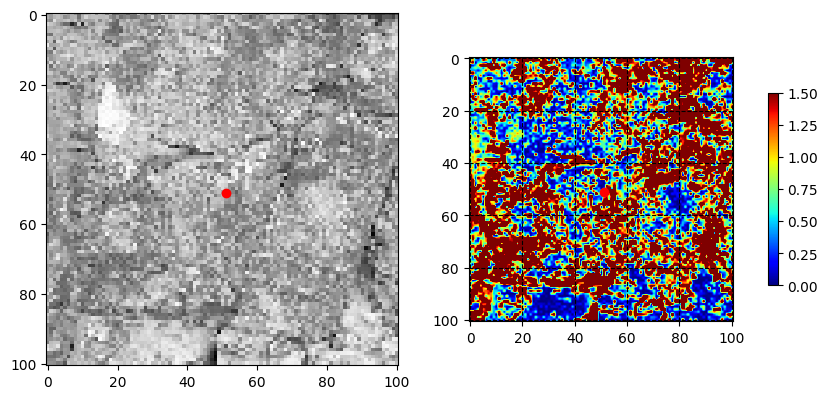

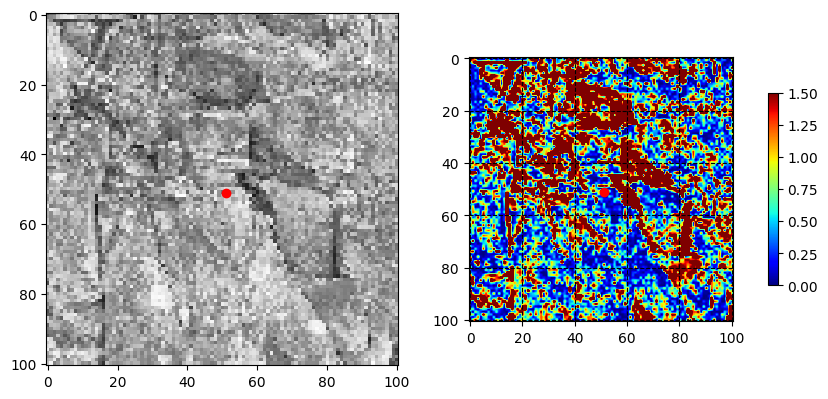

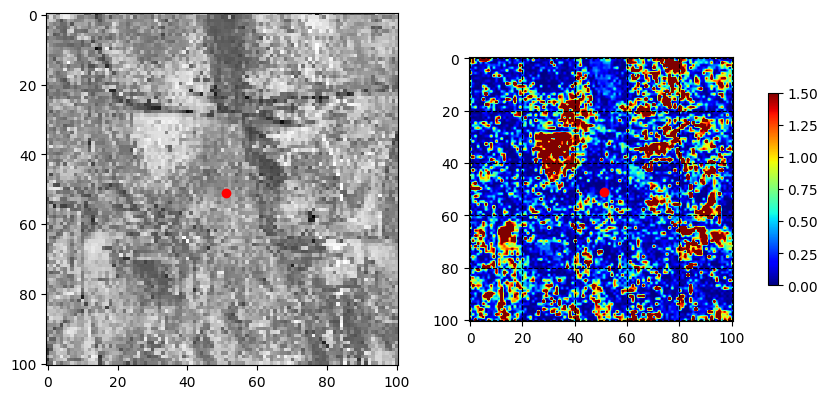

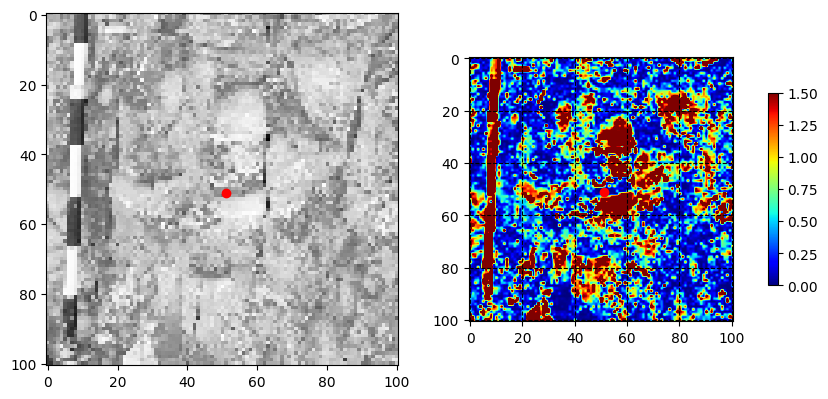

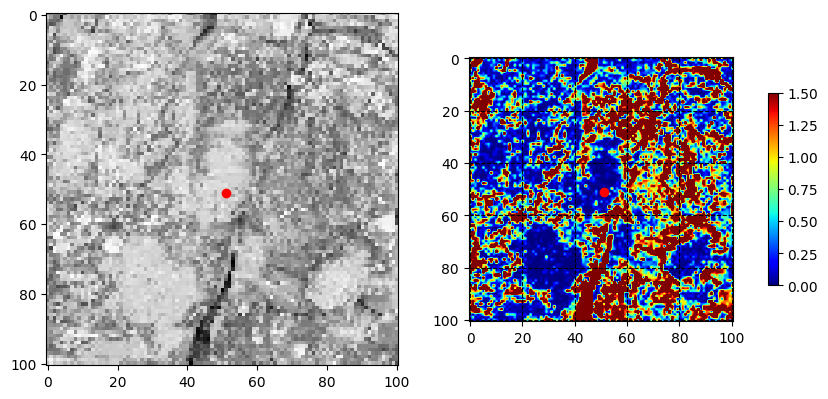

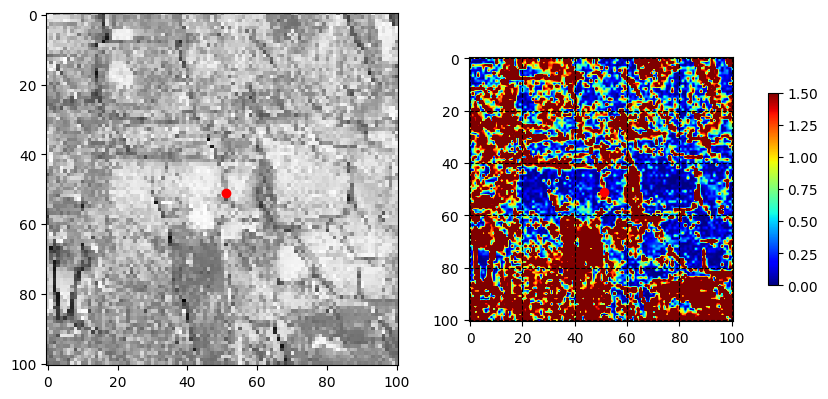

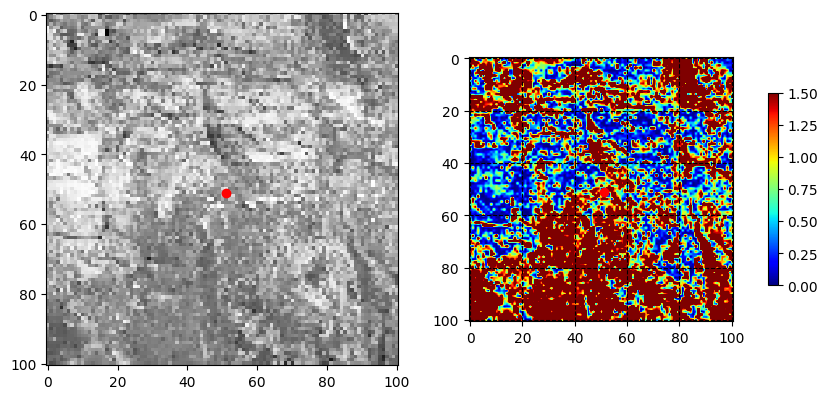

In [16]:
dx = 50 # en pixeles ... cuantos pixeles tomar antes y despues
dy = 50 # en pixeles ... cuanto pixlews tomar arriba y abajo
N = 0 # conteo de pares realizados
mapaVariograma = np.zeros((1+dx*2, 1+dy*2))
pasos = 100 # cantidad de pixeles para avanzar 100-50-25-10

for i in range(dx, imagenGris.shape[0]-dx, pasos):
    for j in range(dy, imagenGris.shape[1]-dy, pasos):
        #print(i,j)
        pixel_x = i
        pixel_y = j
        valorPixel = imagenGris[pixel_x, pixel_y]

        bloqueImagen = imagenGris[pixel_x-dx:pixel_x+dx+1, pixel_y-dy:pixel_y+dy+1]
        #print(bloqueImagen.shape)

        # se calcula la semivarianza del pixel respecto al bloque de la imagen
        semivarianza = ((bloqueImagen - valorPixel)**2)/2

        # se va a realizar la sumatoria, luego se dividira
        mapaVariograma = mapaVariograma + semivarianza
        N += 1

        plt.figure(figsize=(10,5))
        plt.subplot(121)
        plt.imshow(bloqueImagen, cmap='Greys')
        plt.scatter([dx+1], [dy+1], c='r')

        plt.subplot(122)
        plt.imshow(semivarianza, cmap='jet', vmin=0, vmax=1.5)
        plt.colorbar(shrink=0.5, orientation='vertical', pad=0.1)
        plt.scatter([dx+1], [dy+1], c='r')

        plt.grid(ls='--', c='k')
        plt.show()

# se divide toda la sumatoria entre el total de semivarianzas estimadas
# para obtener el promedio
mapaVariograma = mapaVariograma/N

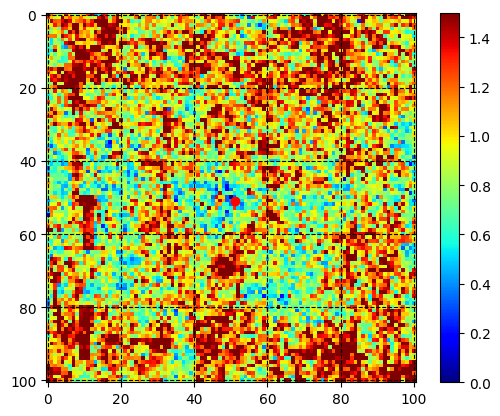

In [17]:
##print(mapaVariograma)

plt.subplot(111)
plt.scatter([dx+1], [dy+1], c='r')
plt.imshow(mapaVariograma, cmap='jet', vmin=0, vmax=1.5)
plt.colorbar()
plt.grid(ls='--', c='k')
plt.show()

El mapa variográfico, o mapa de variograma, o abanico variográfico, es una herramienta útil para comprender la distribución de nuestra variable de estudio y tomar decisiones posteriores al realizar análisis, o lo más deseado, que es la interpolación por krigeado.

---

## Consideraciones

- **Detección de Dependencia Espacial**: Permite identificar y cuantificar la dependencia espacial de las variables geológicas, geofísicas o ambientales, entre otras. No necesariamente se limita a datos espaciales, como lo fue en nuestro caso; la distancia no solo se considera en unidades cartográficas.

- **Identificación de Anisotropía**: Ayuda a detectar la existencia de anisotropía, es decir, la dirección en la que la variable de estudio varía más o varía menos.

- **Interpolación**: Mejora la precisión de métodos de interpolación como el krigeado, al proporcionar información sobre la variabilidad espacial de los datos.

- **Dependencia de la Muestra**: La precisión y calidad del variograma dependen en gran medida de la cantidad y distribución espacial de las muestras. Muestras insuficientes o mal distribuidas pueden llevar a un variograma poco representativo.

- **Suposición de Estacionariedad**: Se asume que la variable es estacionaria. Una serie es estacionaria cuando es estable a lo largo del tiempo, es decir, cuando la media y varianza son constantes en el tiempo.

- **Complejidad en la Interpretación**: La interpretación del variograma y su ajuste a modelos teóricos pueden ser complejos y requieren experiencia. Elegir incorrectamente un modelo puede llevar a resultados erróneos.

- **Sensibilidad a Outliers**: Los datos atípicos (outliers) pueden influir significativamente en el cálculo del variograma, distorsionando la interpretación de la dependencia espacial. Recordando la fórmula de la semivarianza, que se asemeja a un promedio, es importante considerar que cualquier expresión similar a un promedio es susceptible a datos atípicos.

- **Limitaciones en Datos Heterogéneos**: Puede ser menos eficaz en áreas con datos altamente heterogéneos, donde las propiedades de la variable cambian abruptamente. Para ello, se podría limitar o sectorizar en áreas más pequeñas de trabajo.

# Fin